In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

## Least Squares Regression using numpy

Linear regression analyzes the relationship between two variables, x and y. In general, the goal of linear regression is to find the line that best predicts y from x. This is achieved by finding the line that minimizes the sum of the squares of the vertical distances of the points from the line – the method is commonly called ‘least squares’. The Least squares method of line fitting assumes (i) that there is a linear relationship between y and x, defined by an equation y = a + bx (with a data set of n points); (ii) all errors are in the y direction; and (iii) errors are constant (absolute).

It is important to notice that the line of regression of x on y is not the same line as y on x, except in the highly unlikely case that the correlation coefficient is 1 exactly (Miller and Miller, 1993). Therefore depending on the type of data it may or may not be essential to consider the x on y fit, and errors that occur in the x-direction.

In this case, a table of experimental data (Table 1) has been given: concentration (x) and absorbance (y):

In [2]:
# Read data

conc_abs = pd.read_csv("Data/least_squares_data.csv")
print(conc_abs)

   Conc (x)  Abs (y)
0      0.75     8.00
1      0.95    10.85
2      1.70     9.38
3      2.10    12.44
4      4.00    11.64
5      5.00    16.00
6      7.50    16.00
7      9.50    23.38
8     12.50    16.00
9     14.50    20.17


### Least squares fit assuming only y has errors

In [3]:
# Perform a linear regression using np.polyfit()

a, b = np.polyfit(conc_abs["Conc (x)"], 
                  conc_abs["Abs (y)"],
                  1)

print(f'slope = {a}')
print(f'intercept = {b}')

slope = 0.8067992200961278
intercept = 9.66622456243765


In [4]:
# Calculate correlation coefficient (r)

r = np.corrcoef(conc_abs["Conc (x)"], 
                conc_abs["Abs (y)"])

print(f'corr. coef. = {r[0,1]}')

corr. coef. = 0.8232123845699052


In [5]:
# Calculate coefficient of determination (R2)

R2 = r2_score(conc_abs["Abs (y)"],
              a*conc_abs["Conc (x)"] + b)

print(f'coeff. of determ. = {R2}')

coeff. of determ. = 0.6776786301092697


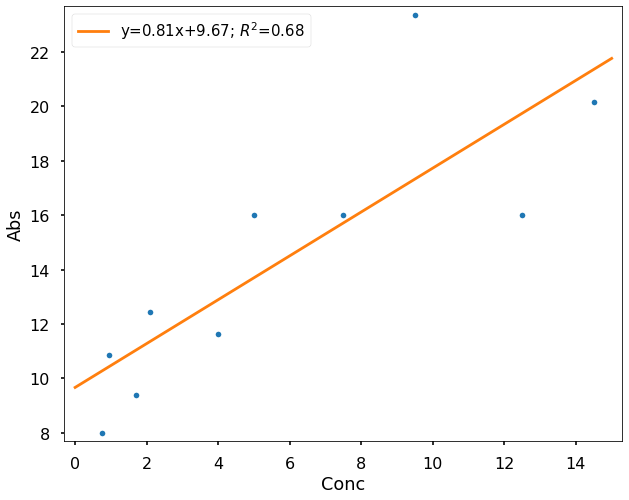

In [6]:
# Plot data

plt.style.use('seaborn-poster')
plt.figure(figsize = (10,8))
plt.plot(conc_abs["Conc (x)"], 
         conc_abs["Abs (y)"], 
         marker='.', 
         linestyle='none')
plt.margins(0.02)
plt.xlabel('Conc')
plt.ylabel('Abs')

# Plot linear regression function

x = np.array([0, 15])
y = a * x + b
plt.plot(x, y,
         label='y={:.2f}x+{:.2f}; $R^2$={:.2f}'.format(a, 
                                                       b, 
                                                       R2))
plt.legend(fontsize=15)
plt.show()

### Linear regression on non-linear data

In [7]:
# Read data

non_linear_conc_abs = pd.read_csv("Data/non_linear_data.csv")
print(non_linear_conc_abs)

   Conc (x)  Abs (y)
0         0    0.001
1         1    0.024
2         2    0.045
3         5    0.110
4        10    0.218
5        20    0.444
6        50    0.883
7       100    1.454


In [8]:
# Perform linear regression using np.polyfit()

a, b = np.polyfit(non_linear_conc_abs["Conc (x)"], 
                  non_linear_conc_abs["Abs (y)"],
                  1)

print(f'slope = {a}')
print(f'intercept = {b}')

slope = 0.014696644217371114
intercept = 0.052003860891779025


In [9]:
# Calculate correlation coefficient (r)

r = np.corrcoef(non_linear_conc_abs["Conc (x)"],
                non_linear_conc_abs["Abs (y)"])

print(f'corr. coef. = {r[0,1]}')

corr. coef. = 0.9920862131572319


In [10]:
# Calculate coefficient of determination (R2)

R2 = r2_score(non_linear_conc_abs["Abs (y)"],
              a*non_linear_conc_abs["Conc (x)"] + b)

print(f'coeff. of determ. = {R2}')

coeff. of determ. = 0.9842350543366568


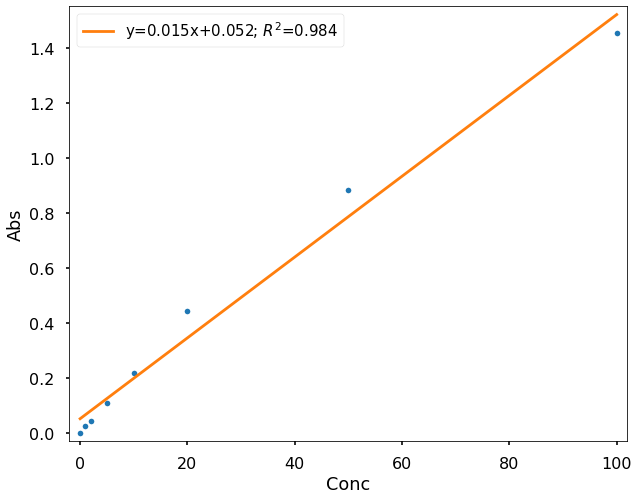

In [11]:
# Plot data

plt.style.use('seaborn-poster')
plt.figure(figsize = (10,8))
plt.plot(non_linear_conc_abs["Conc (x)"], 
         non_linear_conc_abs["Abs (y)"], 
         marker='.', 
         linestyle='none')
plt.margins(0.02)
plt.xlabel('Conc')
plt.ylabel('Abs')

# Plot linear regression function

x = np.array([0, 100])
y = a * x + b
plt.plot(x, y,
         label='y={:.3f}x+{:.3f}; $R^2$={:.3f}'.format(a, 
                                                       b, 
                                                       R2))
plt.legend(fontsize=15)
plt.show()

### Non-linear regression

#### 2nd order polynomial

In [12]:
# Perform non-linear regression using np.polyfit()

a, b, c = np.polyfit(non_linear_conc_abs["Conc (x)"], 
                     non_linear_conc_abs["Abs (y)"],
                     2)

print(f'a = {a}')
print(f'b = {b}')
print(f'c = {c}')

a = -7.061775612764916e-05
b = 0.021485600117627537
c = 0.007482067528661217


In [13]:
# Calculate coefficient of determination (R2)

R2 = r2_score(non_linear_conc_abs["Abs (y)"],
              a*(non_linear_conc_abs["Conc (x)"])**2 \
              + (b*non_linear_conc_abs["Conc (x)"]) + c)
print(R2)

0.9990213906549068


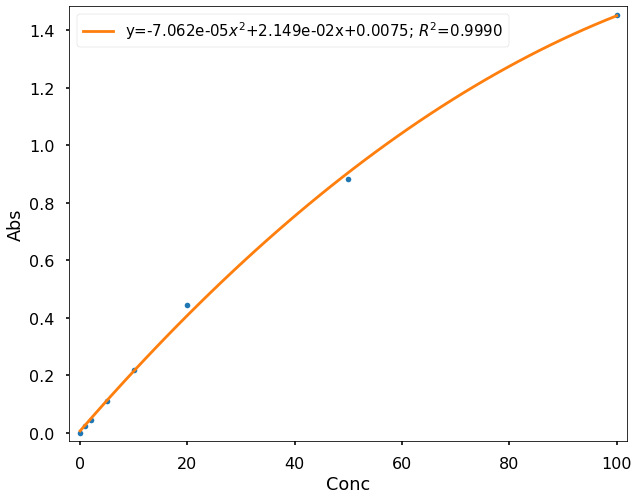

In [14]:
# Plot data

plt.style.use('seaborn-poster')
plt.figure(figsize = (10,8))
plt.plot(non_linear_conc_abs["Conc (x)"], 
         non_linear_conc_abs["Abs (y)"], 
         marker='.', 
         linestyle='none')
plt.margins(0.02)
plt.xlabel('Conc')
plt.ylabel('Abs')

# Plot 2nd order polynomial function

x = np.linspace(0, 100, 50)
y = a * (x**2) + (b * x) + c
plt.plot(x, y,
         label='y={:.3e}$x^2$+{:.3e}x+{:.4f}; $R^2$={:.4f}'.format(a,
                                                                   b,
                                                                   c,
                                                                   R2))
plt.legend(fontsize=15)
plt.show()

#### 3rd order polynomial

In [15]:
# Perform non-linear regression using np.polyfit()

a, b, c, d = np.polyfit(non_linear_conc_abs["Conc (x)"], 
                        non_linear_conc_abs["Abs (y)"],
                        3)

print(f'a = {a}')
print(f'b = {b}')
print(f'c = {c}')
print(f'd = {d}')

a = 8.775329604688873e-07
b = -0.00019588214295677682
c = 0.0253999680587122
d = -0.004886204862438384


In [16]:
# Calculate coefficient of determination (R2)

R2 = r2_score(non_linear_conc_abs["Abs (y)"],
              (a*(non_linear_conc_abs["Conc (x)"])**3) \
              + (b*(non_linear_conc_abs["Conc (x)"])**2) \
              + (c*non_linear_conc_abs["Conc (x)"]) + d)
print(R2)

0.9997833384757149


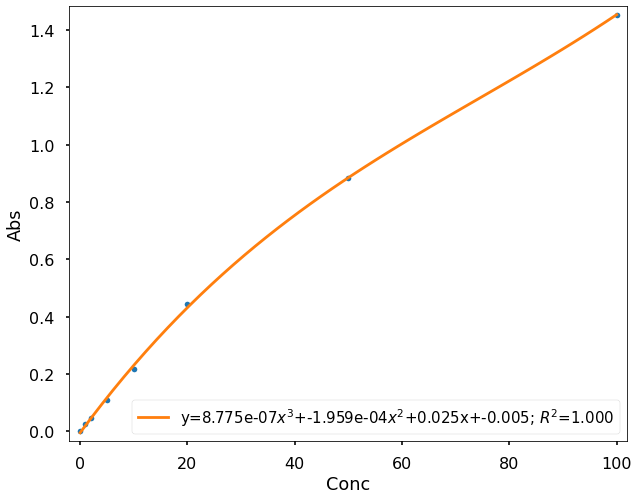

In [17]:
# Plot data

plt.style.use('seaborn-poster')
plt.figure(figsize = (10,8))
plt.plot(non_linear_conc_abs["Conc (x)"], 
         non_linear_conc_abs["Abs (y)"], 
         marker='.', 
         linestyle='none')
plt.margins(0.02)
plt.xlabel('Conc')
plt.ylabel('Abs')

# Plot 3rd order polynomial function

x = np.linspace(0, 100, 50)
y = a * (x**3) + (b * x**2) + (c * x) + d
plt.plot(x, y,
         label='y={:.3e}$x^3$+{:.3e}$x^2$+{:.3f}x+{:.3f}; $R^2$={:.3f}'.format(a,
                                                                               b,
                                                                               c,
                                                                               d,
                                                                               R2))
plt.legend(fontsize=15)
plt.show()

## References

Miller, J.C. and Miller, J.N. (1993). Statistics for Analytical Chemistry, 3rd ed., Ellis Horwood Ltd., England.